# Customer Behaviour and Shopping Habits 

## Exploratory Data Analysis

## By Chakkala Siri 

In [7]:
import pandas as pd
import numpy as np
df = pd.read_csv("Shopping_Behaviour.csv")
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [8]:
df.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

In [9]:
missing_values = df.isnull().sum()
print("\nMissing values in the dataset:")
print(missing_values)


Missing values in the dataset:
Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


In [10]:
numeric_stats = df.describe()
print("Basic Statistics for Numeric Columns:")
print(numeric_stats)

Basic Statistics for Numeric Columns:
       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000  


In [11]:
# Count unique values and frequency of categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Unique values and frequency count for '{col}':")
    print(data[col].value_counts())
    print()

Unique values and frequency count for 'Gender':
Gender
Male      2652
Female    1248
Name: count, dtype: int64

Unique values and frequency count for 'Item Purchased':
Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

Unique values and frequency count for 'Category':
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

Unique values and frequency count for 'Location':
Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota 

### 1. How is the distribution of customer ages in the dataset? Are there any age groups that stand out? 

Descriptive Statistics for Age:
count    3900.000000
mean       44.068462
std        15.207589
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: Age, dtype: float64


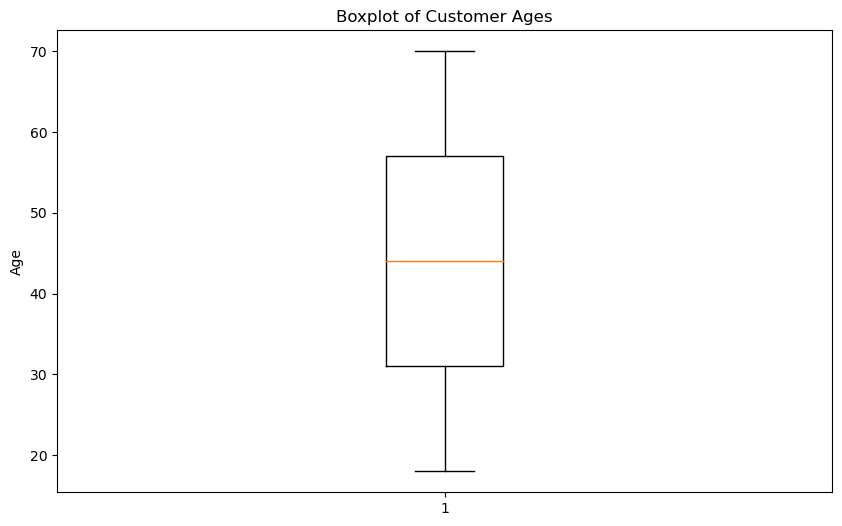

In [16]:
# Descriptive statistics for Age column
age_stats = data['Age'].describe()
print("Descriptive Statistics for Age:")
print(age_stats)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.boxplot(df['Age'])
plt.title('Boxplot of Customer Ages')
plt.ylabel('Age')
plt.show()

### 2. What is the gender distribution among customers? Does it vary significantly across different categories? 

In [17]:
# Gender distribution count and percentage
gender_count = data['Gender'].value_counts()
gender_percentage = data['Gender'].value_counts(normalize=True) * 100

print("Gender Distribution Count:")
print(gender_count)
print("\nGender Distribution Percentage:")
print(gender_percentage)

# Gender distribution across categories (example: Category)
gender_category = pd.crosstab(data['Category'], data['Gender'])
print("Gender Distribution Across Categories:")
print(gender_category)


Gender Distribution Count:
Gender
Male      2652
Female    1248
Name: count, dtype: int64

Gender Distribution Percentage:
Gender
Male      68.0
Female    32.0
Name: proportion, dtype: float64
Gender Distribution Across Categories:
Gender       Female  Male
Category                 
Accessories     392   848
Clothing        556  1181
Footwear        199   400
Outerwear       101   223


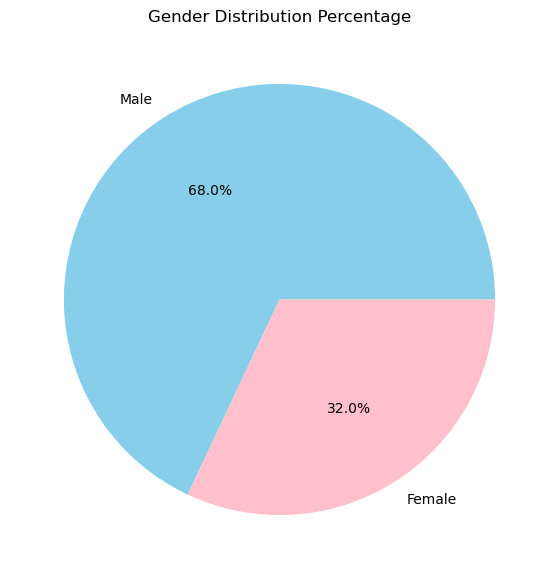

In [18]:
# Gender distribution percentages
gender_percentages = {'Male': 68.0, 'Female': 32.0}

# Plotting the percentages as a pie chart
plt.figure(figsize=(7, 7))
plt.pie(gender_percentages.values(), labels=gender_percentages.keys(), autopct='%1.1f%%', colors=['skyblue', 'pink'])
plt.title('Gender Distribution Percentage')
plt.show()


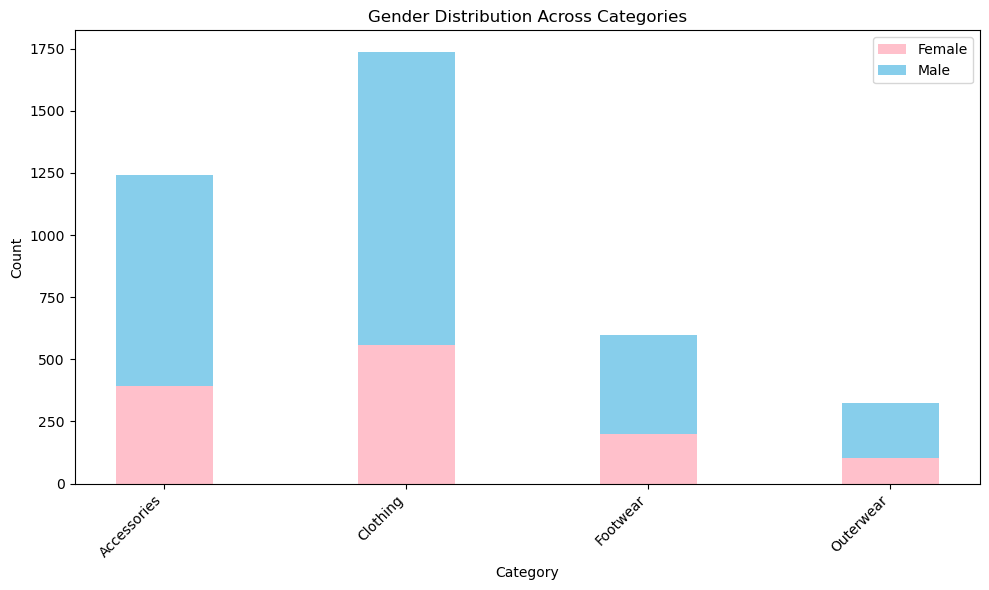

In [19]:
# Gender distribution data across categories
data = {
    'Category': ['Accessories', 'Clothing', 'Footwear', 'Outerwear'],
    'Female': [392, 556, 199, 101],
    'Male': [848, 1181, 400, 223]
}

# Convert data to a DataFrame
df = pd.DataFrame(data)
categories = df['Category']
female_counts = df['Female']
male_counts = df['Male']

# Plotting the grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, female_counts, width=0.4, label='Female', color='pink')
plt.bar(categories, male_counts, width=0.4, label='Male', color='skyblue', bottom=female_counts)

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Gender Distribution Across Categories')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


### 3. Which items are most frequently purchased by customers, and are there any seasonal trends in their purchases? 

In [25]:
df = pd.read_csv("Shopping_Behaviour.csv")
# Most frequently purchased items
top_items = df['Item Purchased'].value_counts().head(10)  # Adjust the number as needed
print("Top Most Frequently Purchased Items:")
print(top_items)

# Seasonal trends in purchases
seasonal_trends = df.groupby('Season')['Item Purchased'].count()
print("\nSeasonal Trends in Purchases:")
print(seasonal_trends)

Top Most Frequently Purchased Items:
Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Name: count, dtype: int64

Seasonal Trends in Purchases:
Season
Fall      975
Spring    999
Summer    955
Winter    971
Name: Item Purchased, dtype: int64


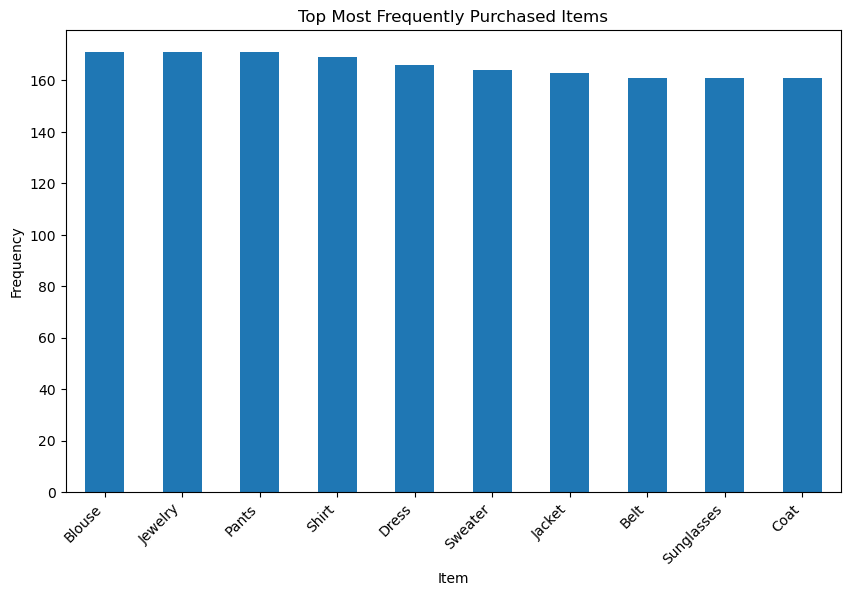

In [28]:
# Bar plot for most frequently purchased items
plt.figure(figsize=(10, 6))
top_items.plot(kind='bar')
plt.title('Top Most Frequently Purchased Items')
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

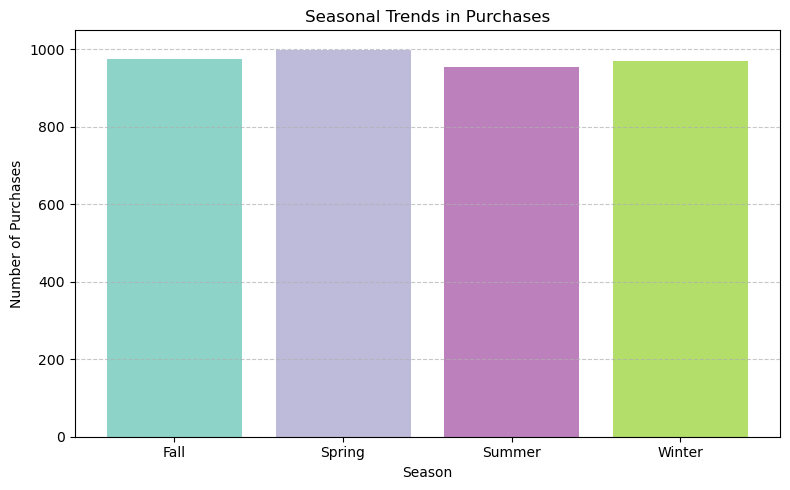

In [32]:
# Seasonal data
seasons = ['Fall', 'Spring', 'Summer', 'Winter']
purchases = [975, 999, 955, 971]

# Plotting the bar chart
plt.figure(figsize=(8, 5))
plt.bar(seasons, purchases, color=['#8DD3C7', '#BEBADA', '#BC80BD', '#B3DE69'])
plt.xlabel('Season')
plt.ylabel('Number of Purchases')
plt.title('Seasonal Trends in Purchases')
plt.ylim(0, max(purchases) + 50)  # Adjusting y-axis limit for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



### 4. What is the average purchase amount for different categories of items? Are there any outliers or trends in high-value purchases? 

Average Purchase Amount by Category:
Category
Accessories    59.838710
Clothing       60.025331
Footwear       60.255426
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64


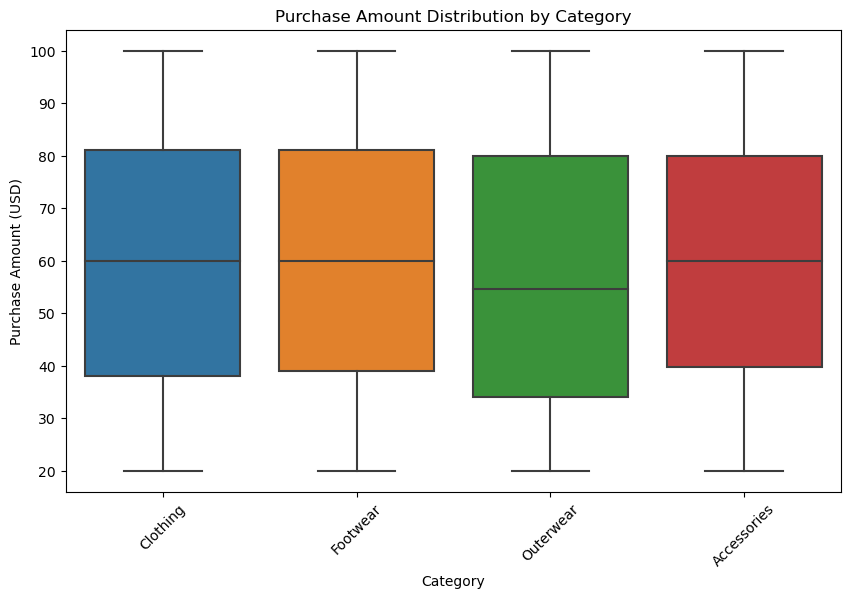

In [34]:
# Average purchase amount by category
avg_purchase_by_category = df.groupby('Category')['Purchase Amount (USD)'].mean()
print("Average Purchase Amount by Category:")
print(avg_purchase_by_category)

# Box plot for purchase amount distribution by category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Category', y='Purchase Amount (USD)')
plt.title('Purchase Amount Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

### 5. How do customer ratings vary across different product categories? 

Average Rating by Category:
Category
Accessories    3.768629
Clothing       3.723143
Footwear       3.790651
Outerwear      3.746914
Name: Review Rating, dtype: float64


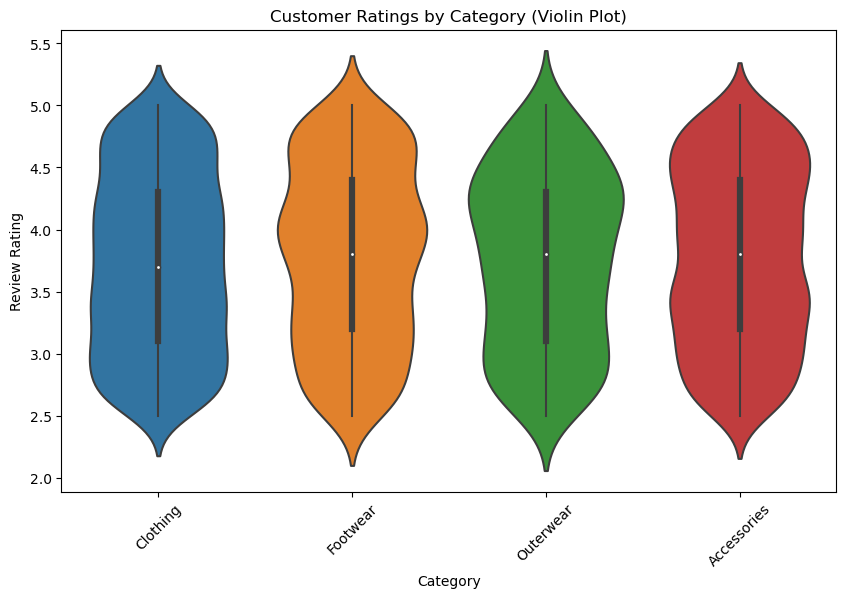

In [37]:
# Average rating by category
avg_rating_by_category = df.groupby('Category')['Review Rating'].mean()
print("Average Rating by Category:")
print(avg_rating_by_category)

# a violin plot for a more detailed view of the rating distribution
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Category', y='Review Rating')
plt.title('Customer Ratings by Category (Violin Plot)')
plt.xlabel('Category')
plt.ylabel('Review Rating')
plt.xticks(rotation=45)
plt.show()

### 6. Is there a correlation between the size of items purchased and their prices?

In [38]:

# Check column names and data types
print("Original DataFrame Info:")
print(df.info())

# Ensure 'Color' and 'Category' columns are categorical or object type
df['Color'] = df['Color'].astype('category')
df['Category'] = df['Category'].astype('category')

# Perform one-hot encoding for 'Color' and 'Category' columns
df_encoded = pd.get_dummies(df, columns=['Color', 'Category'], drop_first=True)

# Display the first few rows of the encoded DataFrame to verify the transformation
print("\nEncoded DataFrame Info:")
print(df_encoded.info())
print("\nEncoded DataFrame Preview:")
print(df_encoded.head())


Original DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used

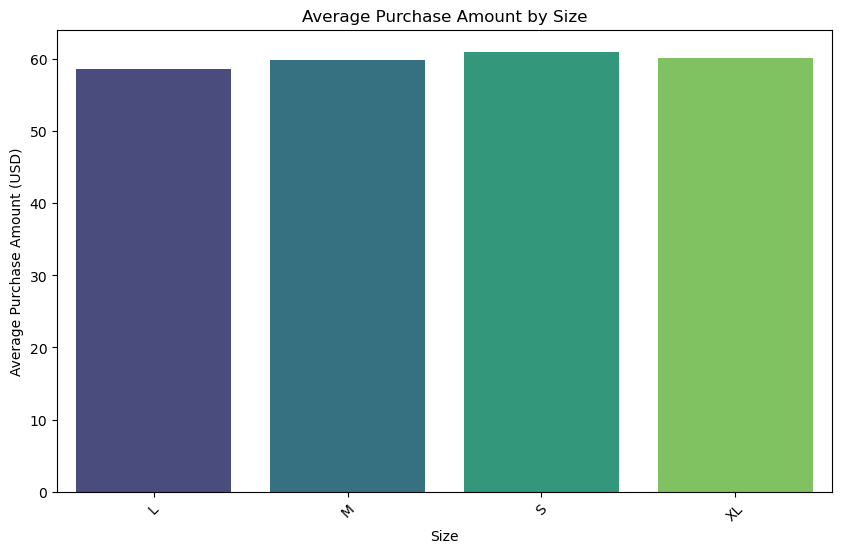

In [43]:
# Calculate the average purchase amount for each size
avg_purchase_by_size = df.groupby('Size')['Purchase Amount (USD)'].mean().reset_index()

# Plot the relationship between sizes and average purchase amount
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_purchase_by_size, x='Size', y='Purchase Amount (USD)', palette='viridis')
plt.title('Average Purchase Amount by Size')
plt.xlabel('Size')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

### 7. What are the most popular colors chosen by chosen by customers across different product categories? 

In [39]:
# Count color frequencies by category
color_freq_by_category = df.groupby(['Category', 'Color']).size().reset_index(name='Count')

# Get the most popular color for each category
most_popular_colors = color_freq_by_category.groupby('Category').apply(lambda x: x.nlargest(1, 'Count')).reset_index(drop=True)

# Display the most popular colors by category
print(most_popular_colors[['Category', 'Color', 'Count']])

      Category  Color  Count
0  Accessories  Olive     66
1     Clothing   Teal     84
2     Footwear  Olive     31
3    Outerwear   Blue     19


C:\Users\Dell\AppData\Local\Temp\ipykernel_3212\385302582.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  color_freq_by_category = df.groupby(['Category', 'Color']).size().reset_index(name='Count')
C:\Users\Dell\AppData\Local\Temp\ipykernel_3212\385302582.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  most_popular_colors = color_freq_by_category.groupby('Category').apply(lambda x: x.nlargest(1, 'Count')).reset_index(drop=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_3212\385302582.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in

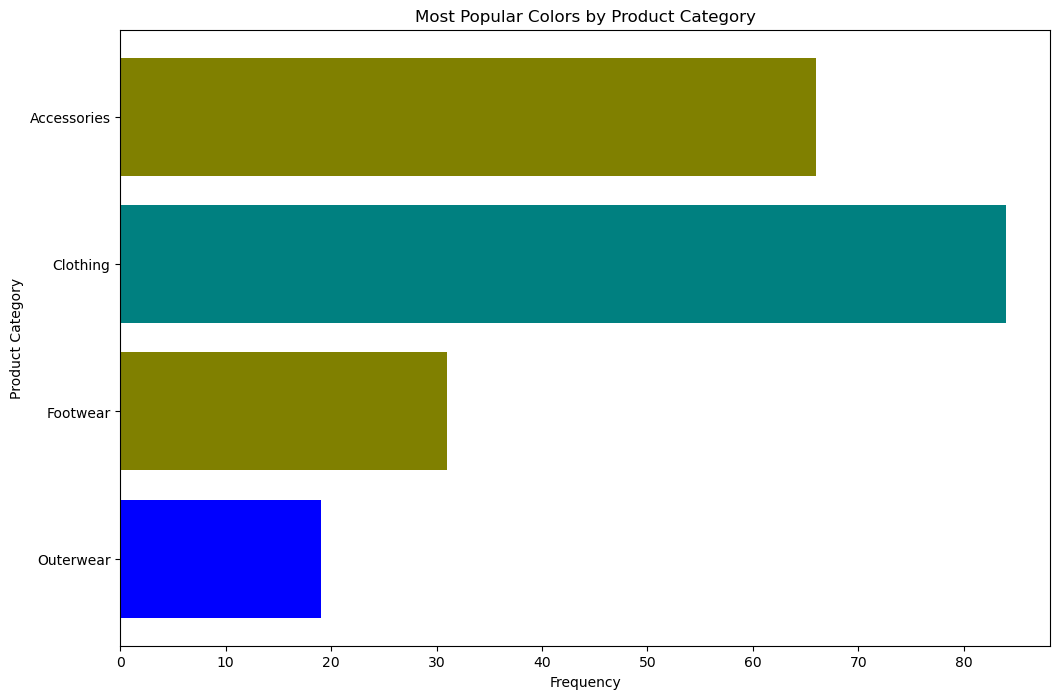

In [40]:
# Create a bar chart for most popular colors by category
plt.figure(figsize=(12, 8))
plt.barh(most_popular_colors['Category'], most_popular_colors['Count'], color=most_popular_colors['Color'])
plt.xlabel('Frequency')
plt.ylabel('Product Category')
plt.title('Most Popular Colors by Product Category')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

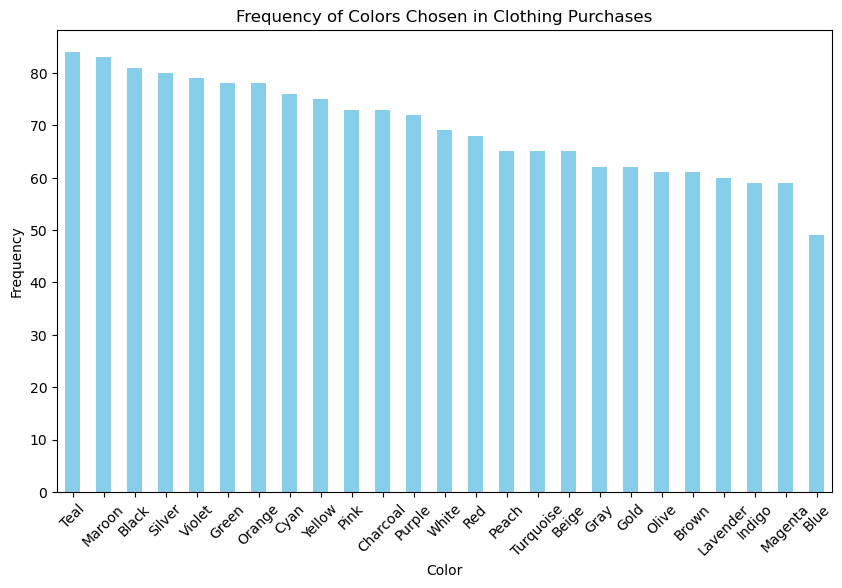

In [41]:
# Count the frequency of each color in the 'Color' column
color_counts = df[df['Category'] == 'Clothing']['Color'].value_counts()

# Plotting the bar chart for color frequency
plt.figure(figsize=(10, 6))
color_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Colors Chosen in Clothing Purchases')
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### 8. How does the seasonality affect the frequency of purchases and the types of items bought?

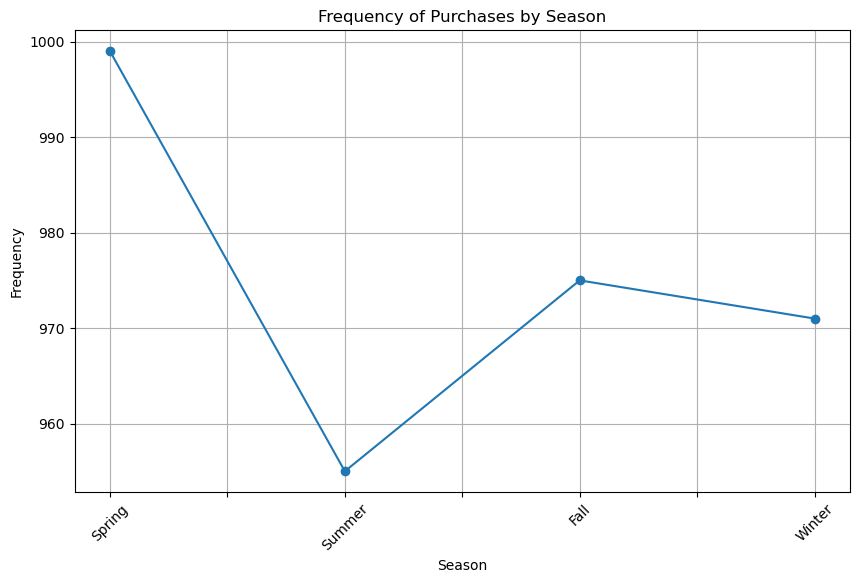

C:\Users\Dell\AppData\Local\Temp\ipykernel_3212\2804269239.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  items_by_season = df.groupby(['Season', 'Category']).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

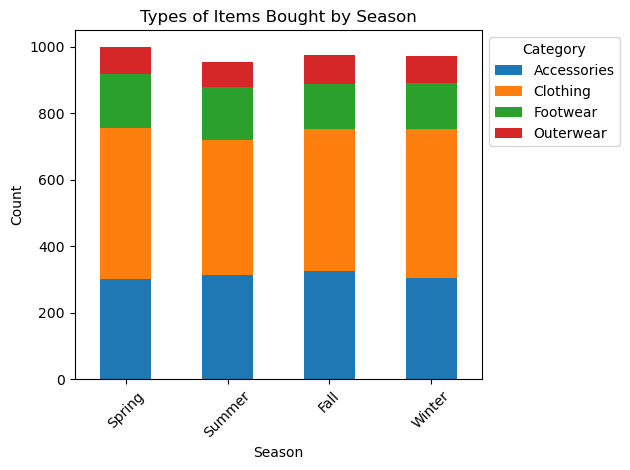

In [44]:
# Convert 'Season' column to categorical for proper ordering
df['Season'] = pd.Categorical(df['Season'], categories=['Spring', 'Summer', 'Fall', 'Winter'], ordered=True)

# Count frequency of purchases by season
purchase_freq_by_season = df['Season'].value_counts().sort_index()

# Plot frequency of purchases by season
plt.figure(figsize=(10, 6))
purchase_freq_by_season.plot(kind='line', marker='o')
plt.title('Frequency of Purchases by Season')
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Analyze types of items bought by season
items_by_season = df.groupby(['Season', 'Category']).size().unstack(fill_value=0)

# Plot types of items bought by season (stacked bar plot)
plt.figure(figsize=(12, 8))
items_by_season.plot(kind='bar', stacked=True)
plt.title('Types of Items Bought by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


### 9. What is the preferred shipping types among customers, and does it  vary based on location or purchase amount? 

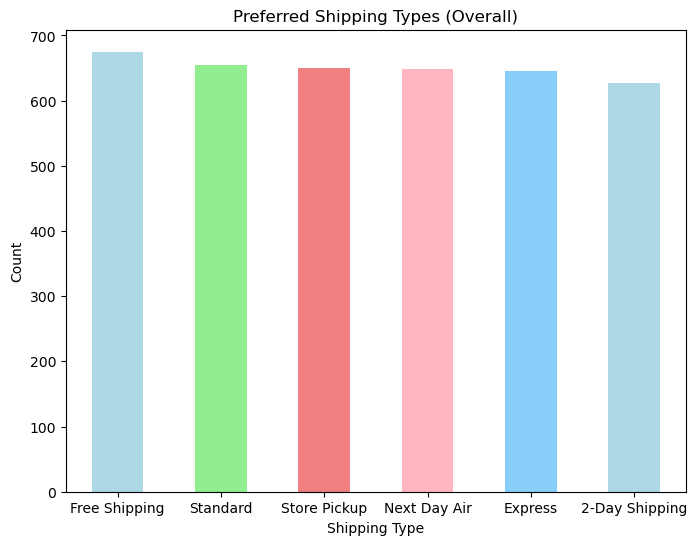

In [45]:
# Count preferred shipping types
shipping_counts = df['Shipping Type'].value_counts()

# Define light colors for bars
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightskyblue']

# Plot preferred shipping types overall with light colors
plt.figure(figsize=(8, 6))
shipping_counts.plot(kind='bar', color=colors)
plt.title('Preferred Shipping Types (Overall)')
plt.xlabel('Shipping Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


### 10. How often do customers use discounts or promo codes?

In [48]:
# Assuming 'df' is your DataFrame containing the 'Discount Applied' column
df = pd.read_csv("Shopping_Behaviour.csv")

# Clean leading/trailing whitespaces in 'Discount Applied' column (if any)
df['Discount Applied'] = df['Discount Applied'].str.strip()

# Check unique values in the 'Discount Applied' column
print(df['Discount Applied'].unique())

# Filter the DataFrame to include only rows where 'Discount Applied' is 'Yes'
discount_users = df[df['Discount Applied'] == 'Yes']

# Count the number of rows in the filtered DataFrame, which represents the number of customers who used discounts
num_discount_users = len(discount_users)

# Filter the DataFrame to include only rows where 'Discount Applied' is 'Yes'
non_discount_users = df[df['Discount Applied'] == 'No']

# Count the number of rows in the filtered DataFrame, which represents the number of customers who used discounts
num_non_discount_users = len(non_discount_users)

print(f"Number of customers who used discounts: {num_discount_users}")
print(f"Number of customers who used discounts: {num_non_discount_users}")



['Yes' 'No']
Number of customers who used discounts: 1677
Number of customers who used discounts: 2223


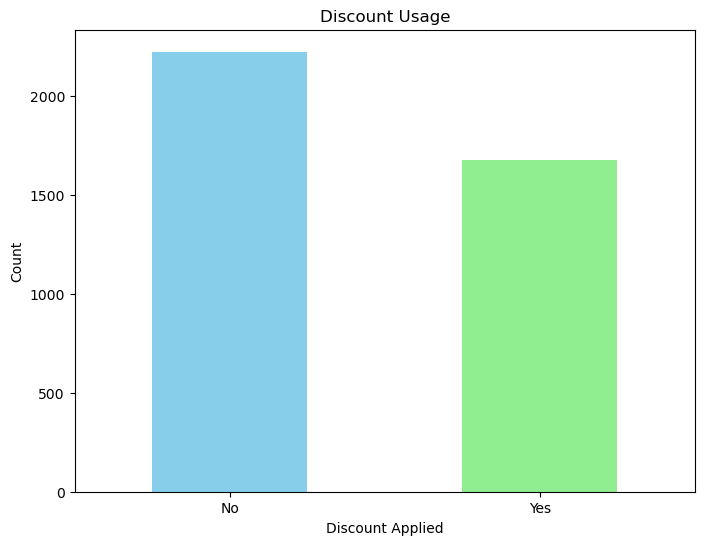

In [49]:
# Count discount usage
discount_counts = df['Discount Applied'].value_counts()

# Plot discount usage
plt.figure(figsize=(8, 6))
discount_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Discount Usage')
plt.xlabel('Discount Applied')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### 11. Which payment methods are most commonly used by customers? 

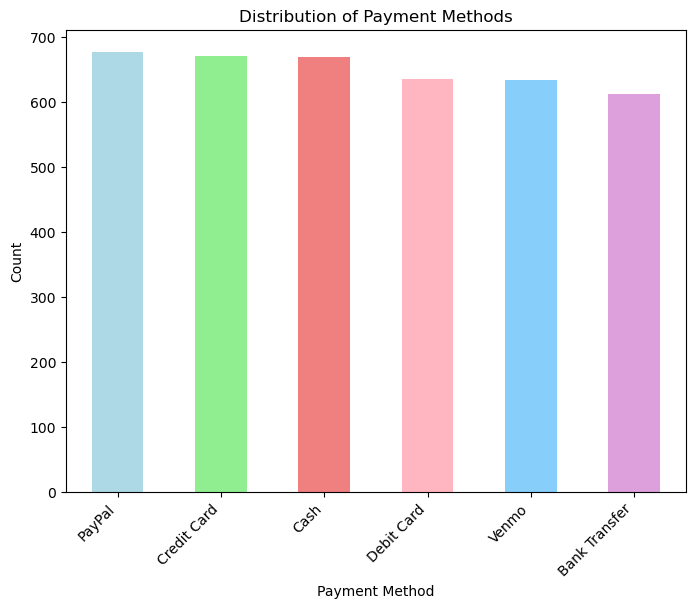

In [50]:
# Count frequency of each payment method
payment_counts = df['Payment Method'].value_counts()

# Plot distribution of payment methods
plt.figure(figsize=(8, 6))
payment_counts.plot(kind='bar', color=['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightskyblue','plum'])
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

### 12. How does the frequency of purchases vary among different age groups and genders? 

In [53]:
df = pd.read_csv("Shopping_Behaviour.csv")

# Check column names and data types
print("Original DataFrame Info:")
print(df.info())

# Ensure 'Color' and 'Category' columns are categorical or object type
df['Frequency of Purchases'] = df['Frequency of Purchases'].astype('category')

# Perform one-hot encoding for 'Color' and 'Category' columns
df_encoded = pd.get_dummies(df, columns=['Frequency of Purchases'], drop_first=True)

# Display the first few rows of the encoded DataFrame to verify the transformation
print("\nEncoded DataFrame Info:")
print(df_encoded.info())
print("\nEncoded DataFrame Preview:")
print(df_encoded.head())

Original DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used

C:\Users\Dell\AppData\Local\Temp\ipykernel_3212\2262395449.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=avg_purchase_melted, x='Age', y='Average Frequency', hue='Gender',


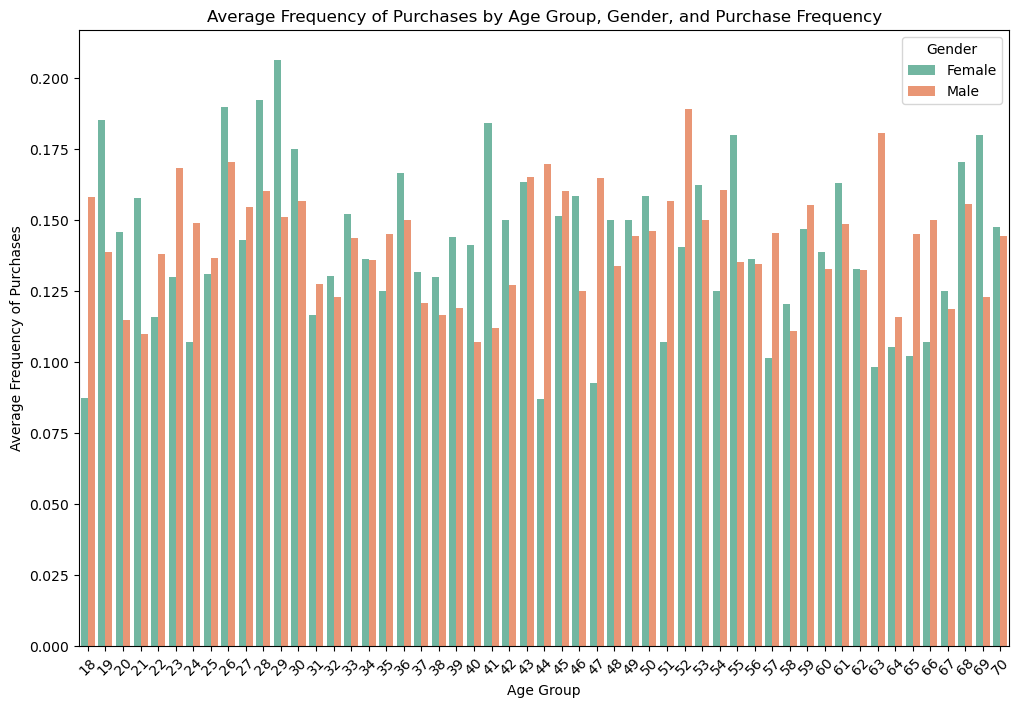

In [54]:
# Calculate average frequency of purchases by age group, gender, and purchase frequency category
avg_purchase_by_age_gender_freq = df_encoded.groupby(['Age', 'Gender'])[['Frequency of Purchases_Bi-Weekly',
                                                                        'Frequency of Purchases_Fortnightly',
                                                                        'Frequency of Purchases_Monthly',
                                                                        'Frequency of Purchases_Quarterly']].mean().reset_index()

# Melt the DataFrame to long format for better visualization
avg_purchase_melted = pd.melt(avg_purchase_by_age_gender_freq, id_vars=['Age', 'Gender'],
                               var_name='Purchase Frequency', value_name='Average Frequency')

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_purchase_melted, x='Age', y='Average Frequency', hue='Gender',
            palette='Set2', ci=None)  # ci=None removes error bars
plt.title('Average Frequency of Purchases by Age Group, Gender, and Purchase Frequency')
plt.xlabel('Age Group')
plt.ylabel('Average Frequency of Purchases')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.show()

### 13. How does the purchase amount vary based on the payment method used? 

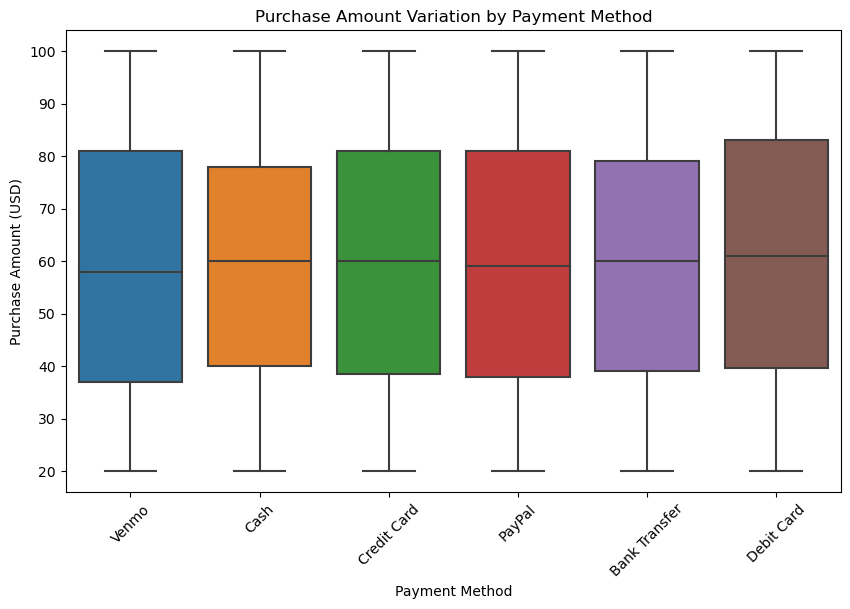

In [56]:
# Create a box plot or violin plot to visualize purchase amount distribution by payment method
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Payment Method', y='Purchase Amount (USD)')
plt.title('Purchase Amount Variation by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

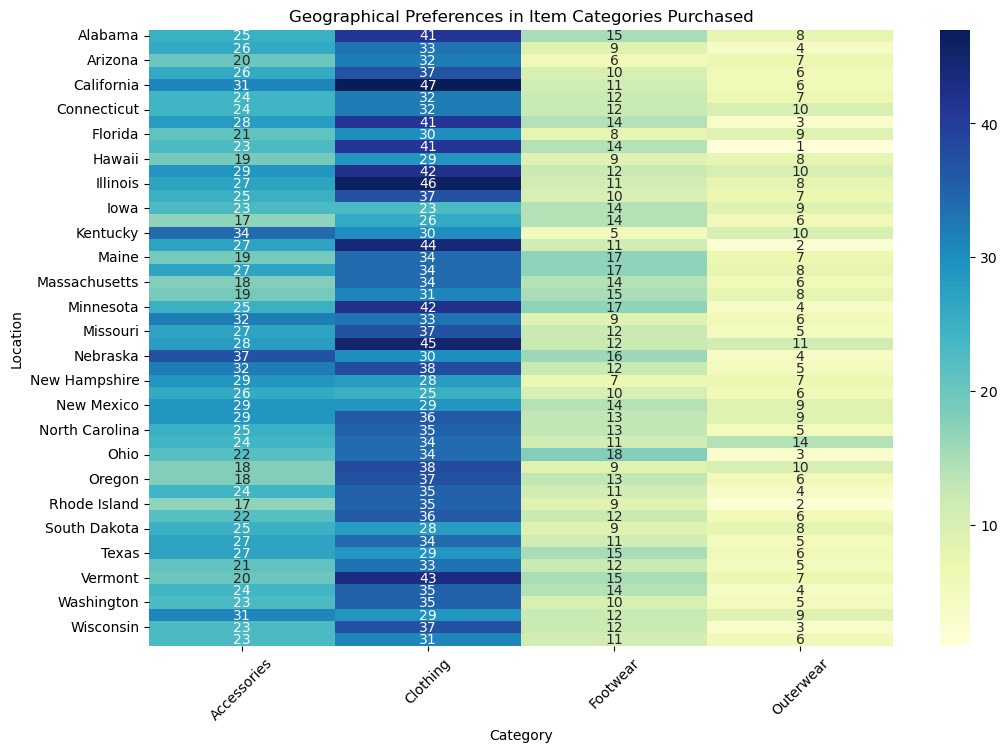

In [57]:
# Group by 'Location' and 'Category' and calculate the count of items purchased
location_category_counts = df.groupby(['Location', 'Category']).size().unstack(fill_value=0)

# Plot heatmap for geographical preferences in item categories
plt.figure(figsize=(12, 8))
sns.heatmap(location_category_counts, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Geographical Preferences in Item Categories Purchased')
plt.xlabel('Category')
plt.ylabel('Location')
plt.xticks(rotation=45)
plt.show()